In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_excel('ecommerce retail.xlsx')

In [13]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


**Inspect Data type**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**CHECKING HOW MANY MISSING VALUES IN EACH COLUMN**

In [11]:
missing_values_count = df.isnull().sum()

In [12]:
print(missing_values_count)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [15]:
# Drop rows where 'customer_id' is null
df_drop_null_customer_id = df[df['CustomerID'].notnull()]

In [17]:
# Select rows with null values in 'description' column
null_description_rows = df[df['Description'].isna()]

In [18]:
null_description_rows.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom


Notice that Description and CustomerID is NaN together => drop CustomerID is null is correct.

In [19]:
df1= df_drop_null_customer_id

In [28]:
# Count transactions by country
country_transactions = df1.groupby('Country')['InvoiceNo'].count()

In [29]:
print(country_transactions)

Country
Australia                 1259
Austria                    401
Bahrain                     17
Belgium                   2069
Brazil                      32
Canada                     151
Channel Islands            758
Cyprus                     622
Czech Republic              30
Denmark                    389
EIRE                      7485
European Community          61
Finland                    695
France                    8491
Germany                   9495
Greece                     146
Iceland                    182
Israel                     250
Italy                      803
Japan                      358
Lebanon                     45
Lithuania                   35
Malta                      127
Netherlands               2371
Norway                    1086
Poland                     341
Portugal                  1480
RSA                         58
Saudi Arabia                10
Singapore                  229
Spain                     2533
Sweden                     462


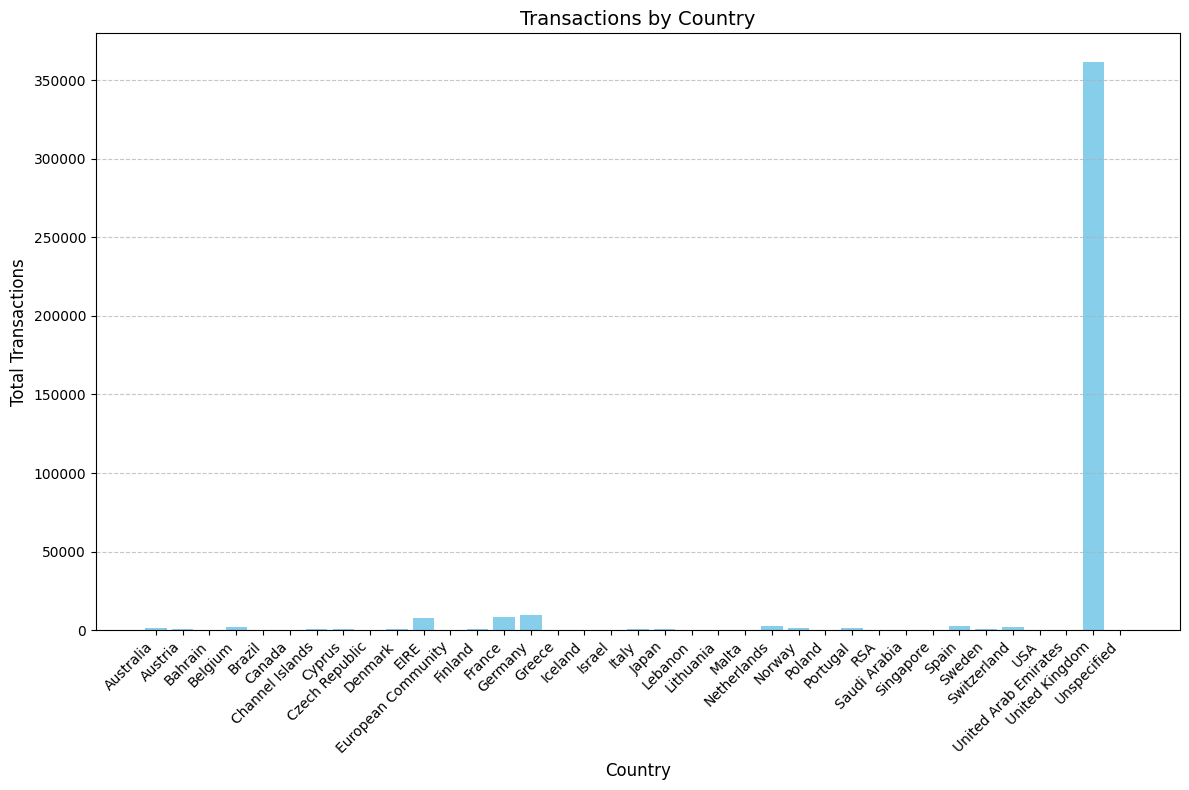

In [33]:
plt.figure(figsize=(12, 8))  # Set figure size for better readability
plt.bar(country_transactions.index, country_transactions.values, color='skyblue')
plt.xlabel('Country', fontsize=12)  # Set label font size
plt.ylabel('Total Transactions', fontsize=12)
plt.title('Transactions by Country', fontsize=14)  # Set title font size
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability

# Reduce the number of ticks on the y-axis if needed for large datasets
# plt.yticks(np.arange(min(country_transactions), max(country_transactions)+100000, 50000))

plt.show()

In [34]:
cancelled = df1[df1['InvoiceNo'].astype(str).str.contains('C')]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [37]:
non_cancelled=df1[df1['Quantity']>0]

In [38]:
non_cancelled.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [39]:
print("Total canceled order: ", len(cancelled))
print("Total non-canceled order: ", len(non_cancelled))

Total canceled order:  8905
Total non-canceled order:  397924


In [43]:
df1['Description'] = df1['Description'].str.lower()

<ipython-input-43-131f0d3a4e37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Description'] = df1['Description'].str.lower()


In [44]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [45]:
df1['Description'] = df1['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)

<ipython-input-45-ddb09a5202be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Description'] = df1['Description'].replace(to_replace=r'[^\w\s]', value='', regex=True)


In [46]:
df1['month'] = df1['InvoiceDate'].dt.month
df1['year'] = df1['InvoiceDate'].dt.year
df1['WeekDay'] = df1['InvoiceDate'].dt.day_name()
df1['month_year'] = pd.to_datetime(df1[['year', 'month']].assign(Day=1))
df1['hour'] = df1['InvoiceDate'].dt.hour

<ipython-input-46-6e384379d2cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['InvoiceDate'].dt.month
<ipython-input-46-6e384379d2cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['year'] = df1['InvoiceDate'].dt.year
<ipython-input-46-6e384379d2cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [47]:
df1['revenue'] = df1['UnitPrice'] * df1['Quantity']

<ipython-input-47-7fbab7172d2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['revenue'] = df1['UnitPrice'] * df1['Quantity']


In [48]:
plot = pd.DataFrame(df1.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
plot2 = pd.DataFrame(df1.groupby(['WeekDay'])['InvoiceNo'].count())
plot3 = pd.DataFrame(df1.groupby(['hour'])['InvoiceNo'].count()).reset_index()
plot4 = pd.DataFrame(df1.groupby(['month_year'])['revenue'].mean()).reset_index()
plot5 = pd.DataFrame(df1.groupby(['month_year'])['revenue'].sum()).reset_index()

In [49]:
import datetime as dt
presence = dt.datetime(2011,12,31)
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
rfm = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'revenue': 'Monetary'}, inplace=True)

<ipython-input-49-88bc327fe05e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])


In [50]:
rfm = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (presence - x.max()).days, 'InvoiceNo': lambda x: len(x), 'revenue': lambda x: x.sum()})
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'revenue': 'Monetary'}, inplace=True)

In [51]:
r_labels, f_labels, m_labels = range(5, 0, -1), range(1, 6), range(1, 6)

rfm['R_score'] = pd.qcut(rfm['Recency'], q=5, labels=r_labels)
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=f_labels)
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=5, labels=m_labels)

In [52]:
rfm['RFM_Score'] = rfm['R_score'].astype(str) \
                            + rfm['F_score'].astype(str) \
                            + rfm['M_score'].astype(str)

In [53]:
seg = pd.read_excel('ecommerce retail.xlsx', sheet_name='Segmentation')

In [54]:
seg['RFM_Score'] = seg['RFM Score'].str.split(',')

In [55]:
seg = seg.explode('RFM_Score').reset_index(drop=True)

In [56]:
rfm['RFM_Score'] = rfm['RFM_Score'].astype(int)

In [57]:
seg['RFM_Score'] = seg['RFM_Score'].astype(int)

In [58]:
df_merged = rfm.merge(seg, on ='RFM_Score', how='left')

In [59]:
df_merged.drop(['RFM Score'], axis=1, inplace=True)

In [60]:
df_merged

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
0,346,2,0.00,1,1,1,111,Lost customers
1,23,182,4310.00,5,5,5,555,Champions
2,96,31,1797.24,2,3,4,234,At Risk
3,39,73,1757.55,4,4,4,444,Loyal
4,331,17,334.40,1,2,2,122,Hibernating customers
...,...,...,...,...,...,...,...,...
4367,298,10,180.60,1,1,1,111,Lost customers
4368,201,7,80.82,1,1,1,111,Lost customers
4369,28,13,176.60,5,1,1,511,New Customers
4370,24,756,2094.88,5,5,5,555,Champions


In [61]:
df_merged['Cust_count'] = df_merged.groupby('Segment').size()

<ipython-input-62-3e14319f1800>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged[col])
<ipython-input-62-3e14319f1800>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_merged[col])
<ipython-input-62-3e14319f1800>:7: UserWarning: 

`distplot` is a deprecated function and will be remo

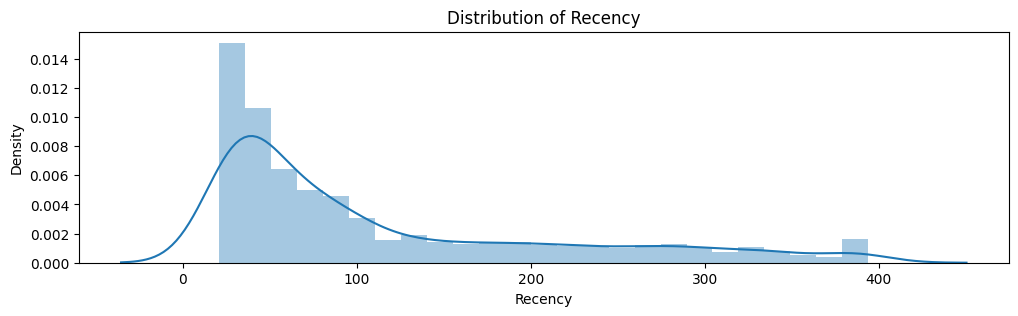

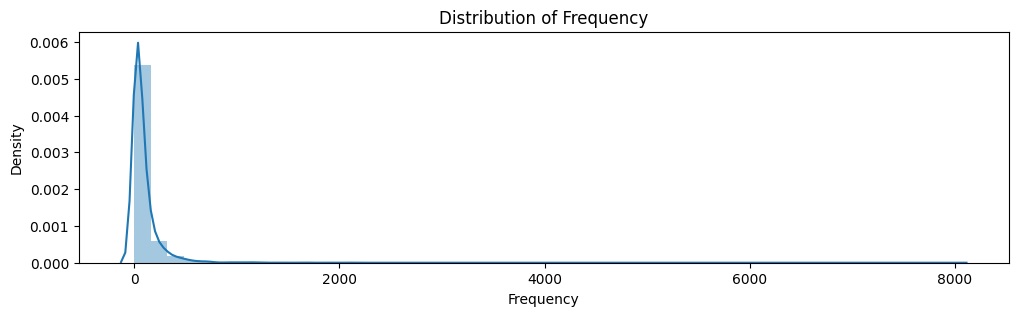

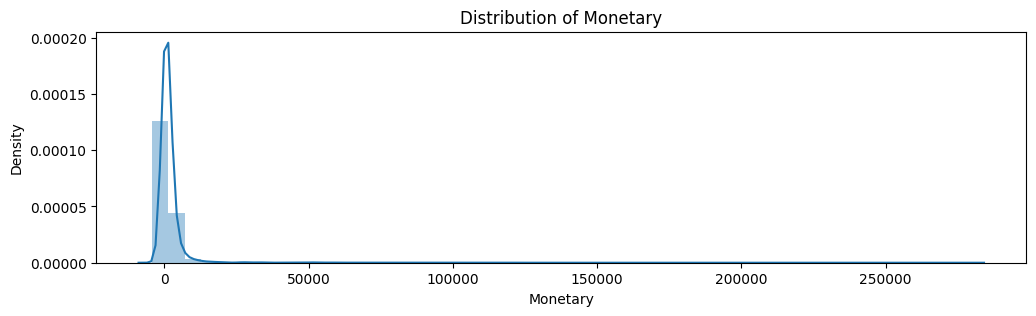

In [62]:
# show distribution of each variable of the model

colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(df_merged[col])
    ax.set_title('Distribution of %s' % col)
    plt.show

In [64]:
Cust_count = df1['CustomerID'].nunique()

In [67]:
segment_counts = df_merged['Segment'].value_counts()

In [68]:
print(segment_counts)

Champions                830
Hibernating customers    815
Potential Loyalist       506
Lost customers           441
At Risk                  428
Loyal                    406
New Customers            301
Need Attention           244
About To Sleep           180
Promising                142
Cannot Lose Them          79
Name: Segment, dtype: int64


In [70]:
segment_ratios = segment_counts / segment_counts.sum()

In [73]:
print(segment_ratios)

Champions                0.189844
Hibernating customers    0.186414
Potential Loyalist       0.115737
Lost customers           0.100869
At Risk                  0.097896
Loyal                    0.092864
New Customers            0.068847
Need Attention           0.055810
About To Sleep           0.041171
Promising                0.032479
Cannot Lose Them         0.018070
Name: Segment, dtype: float64


In [74]:
df_merged

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment,Cust_count
0,346,2,0.00,1,1,1,111,Lost customers,NaN
1,23,182,4310.00,5,5,5,555,Champions,NaN
2,96,31,1797.24,2,3,4,234,At Risk,NaN
3,39,73,1757.55,4,4,4,444,Loyal,NaN
4,331,17,334.40,1,2,2,122,Hibernating customers,NaN
...,...,...,...,...,...,...,...,...,...
4367,298,10,180.60,1,1,1,111,Lost customers,NaN
4368,201,7,80.82,1,1,1,111,Lost customers,NaN
4369,28,13,176.60,5,1,1,511,New Customers,NaN
4370,24,756,2094.88,5,5,5,555,Champions,NaN


from matplotlib import pyplot as plt
df_merged['Recency'].plot(kind='hist', bins=20, title='Recency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_merged['Frequency'].plot(kind='hist', bins=20, title='Frequency')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_merged['Monetary'].plot(kind='hist', bins=20, title='Monetary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_merged['RFM_Score'].plot(kind='hist', bins=20, title='RFM_Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_merged.plot(kind='scatter', x='Recency', y='Frequency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_merged.plot(kind='scatter', x='Frequency', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_merged.plot(kind='scatter', x='Monetary', y='RFM_Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_merged['Recency'].plot(kind='line', figsize=(8, 4), title='Recency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_merged['Frequency'].plot(kind='line', figsize=(8, 4), title='Frequency')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_merged['Monetary'].plot(kind='line', figsize=(8, 4), title='Monetary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_merged['RFM_Score'].plot(kind='line', figsize=(8, 4), title='RFM_Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [79]:
data = {
    "Segment": list(segment_ratios.index),
    "Proportion": list(segment_ratios.values)
}

In [80]:
df2 = pd.DataFrame(data)

In [81]:
print(df2)

                  Segment  Proportion
0               Champions    0.189844
1   Hibernating customers    0.186414
2      Potential Loyalist    0.115737
3          Lost customers    0.100869
4                 At Risk    0.097896
5                   Loyal    0.092864
6           New Customers    0.068847
7          Need Attention    0.055810
8          About To Sleep    0.041171
9               Promising    0.032479
10       Cannot Lose Them    0.018070


In [84]:
import plotly.express as px

# Create the treemap
fig = px.treemap(df2,
                 path=['Segment'],
                 values='Proportion',
                 color='Proportion',
                 color_continuous_scale='viridis',
                 title='Customer Segments by Proportion')

# Display the treemap
fig.show()